### Import modules

In [170]:
# import the modules
import pandas as pd
import numpy as np
import os
from os import listdir
import cv2
from deepface import DeepFace

### Set path to folder directory

In [171]:
# get the path/directory
folder_dir_train = "data/train"
folder_dir_test = "data/test"
folder_dir_try = "D:/BMI/data/try"

### Create dataframes to hold data

In [172]:
#create an empty dataframe 
trainingDf = pd.DataFrame()
testDf = pd.DataFrame()
tryDf = pd.DataFrame()

### Write function to extract gender and height from image names and set dataframe columns
I have decided to code the gender column directly into 0 and 1 for female & male respectively

In [173]:
def createDf(fdir, dfName):
#create new empty lists to hold each column items
    #imageRed = [] #list to hold image names
    #imageBlue = [] #list to hold image names
    #imageGreen = [] #list to hold image names
    #imageAlpha = [] #list to hold image names
    genders = [] #list to hold genders
    heights = [] #list to hold heights
    age = [] #list to hold age
    images = [] #list to hold image matrix
    for imgs in os.listdir(fdir):
        # check if the image ends with png
        #if (images.endswith(".png")):
        #split the name to get gender and height NB - Gender is at index 0 and height at 1. The ones with index 2 are for differentiation purposes
        imgSplit = imgs.split('_')
        
        if len(imgSplit) == 2:
            splitExtension = imgSplit[1].split('.')
            if imgSplit[0] == 'male':
                genders.append(1)
            else:
                genders.append(0)
            heights.append(splitExtension[0])
        else:
            if imgSplit == 'male':
                genders.append(1)
            else:
                genders.append(0)
            heights.append(imgSplit[1])
        
        # get image array
        img = cv2.imread(os.path.join(fdir, imgs), cv2.IMREAD_COLOR)
        # Crop image
        #y=0
        #x=0
       # h=600
        #w=600
        #crop = img[y:y+h, x:x+w]
        # cv2.imshow("image", crop)
        # cv2.waitKey method used for holding the window on the screen
        # First Parameter used for holding of the screen for the milliseconds specified by the user (must be a positive integer value)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        #imageBlue.append(np.array(crop[0]))
        #imageGreen.append(crop[1])
        #imageRed.append(crop[2])
        #imageAlpha.append(crop[3])
        # Analyze image to get age
        analyze = DeepFace.analyze(img, actions=['age'], enforce_detection = False)
        # Save age in a list
        age.append(analyze['age'])
        images.append(imgs)
    #add columns to our empty df
    dfName['age'] = age
    dfName['gender'] = genders
    dfName['height(cm)'] = heights
    #dfName['imageAlpha'] = imageAlpha
    #dfName['imageRed'] = imageRed
    #dfName['imageBlue'] = imageBlue
    #dfName['imageGreen'] = imageGreen
    dfName['index'] = images
    return dfName

### create training and test dataframes from training and test images

In [174]:
createDf(folder_dir_train,trainingDf)

1/1 [==============================] - 1s 608ms/step


1/1 [==============================] - 1s 615ms/step


1/1 [==============================] - 1s 600ms/step


1/1 [==============================] - 1s 619ms/step


,age,gender,height(cm),index
0,31,0,164,female_164.jpg
1,39,0,164,female_164_1.jpg
2,25,0,164,female_164_2.jpg
3,27,0,164,female_164_3.jpg
4,28,0,164,female_164_4.jpg
...,...,...,...,...
469,35,1,206,male_206.jpg
470,27,1,208,male_208.jpg
471,26,1,209,male_209.jpg
472,37,1,214,male_214.jpg


In [175]:
createDf(folder_dir_test,testDf)

1/1 [==============================] - 1s 653ms/step


1/1 [==============================] - 1s 590ms/step


1/1 [==============================] - 1s 598ms/step


,age,gender,height(cm),index
0,29,0,149,female_149.jpg
1,22,0,151,female_151.jpg
2,32,0,153,female_153.jpg
3,41,0,154,female_154.jpg
4,34,0,154,female_154_1.jpg
...,...,...,...,...
310,28,1,202,male_202.jpg
311,40,1,203,male_203.jpg
312,35,1,204,male_204.jpg
313,41,1,213,male_213.jpg


In [176]:
trainingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         474 non-null    int64 
 1   gender      474 non-null    int64 
 2   height(cm)  474 non-null    object
 3   index       474 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.9+ KB


### Predict weights for each entry in both training and test datasets.
I will use regression to do this. Since I prepared the data myself, I know there are no null values etc so I won't do EDA.
To train my model for predicting my weights, I will use the dataset from kaggle after which I will use it for my prediction.

### Import data

In [177]:
data = pd.read_csv('data/SOCR-HeightWeight.csv')
data.head(10)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


The height in this data is in Inches while weight is in pounds. I however want to use meters for height and kg for weight throughout my code.
1 Inch = 0.0254meters (multiply height column with 0.0254)
1kg = 2.205 pounds (divide weight column by 2.205)

In [178]:
data['Height(Meters)'] = data['Height(Inches)'] * 0.0254
data['Weight(Kg)'] = data['Weight(Pounds)'] / 2.205

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
 3   Height(Meters)  25000 non-null  float64
 4   Weight(Kg)      25000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 976.7 KB


Drop the old height and weight columns

In [180]:
data = data.drop(['Height(Inches)', 'Weight(Pounds)', 'Index'], axis=1)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Meters)  25000 non-null  float64
 1   Weight(Kg)      25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


Separate output and input features

In [182]:
X = np.array(data['Height(Meters)'])
y = np.array(data['Weight(Kg)'])

In [183]:
X = X.reshape(-1, 1)

In [184]:
X.shape

(25000, 1)

Import necessary modules

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Split data into training and test sets

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [187]:
regModel = LinearRegression()

In [188]:
regModel.fit(X_train, y_train)

LinearRegression()

In [189]:
# print the intercept
print(regModel.intercept_)

-36.99911501661841


In [190]:
predictions = regModel.predict(X_test)

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Model Evaluation

In [192]:
print(regModel.coef_)

[54.7883102]


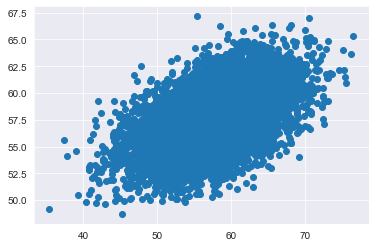

In [193]:
plt.scatter(y_test,predictions)

#### Plot the residual histogram

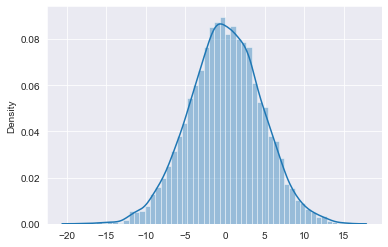

In [194]:
sns.distplot((y_test-predictions),bins=50);

In [195]:
from sklearn import metrics

In [196]:
print(metrics.r2_score(y_test, predictions))

0.25961263876058716


In [197]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6453873437121715
MSE: 20.98026092377213
RMSE: 4.580421478834904


I will now try to standardize my input data to see if my model will perform better

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()

In [200]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
regModel.fit(X_train_scaled, y_train)

LinearRegression()

In [202]:
print(regModel.coef_)

[2.63609895]


In [203]:
predictions = regModel.predict(X_test_scaled)

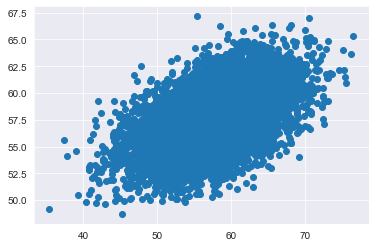

In [204]:
plt.scatter(y_test,predictions)

In [205]:
print(metrics.r2_score(y_test, predictions))

0.25961263876058716


From all indications so far, scaling my input feature has no effect on my result

### Predicting of my dataset weights using height

I will check my two created df again to be sure of what I am working with

In [206]:
trainingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         474 non-null    int64 
 1   gender      474 non-null    int64 
 2   height(cm)  474 non-null    object
 3   index       474 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.9+ KB


In [207]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         315 non-null    int64 
 1   gender      315 non-null    int64 
 2   height(cm)  315 non-null    object
 3   index       315 non-null    object
dtypes: int64(2), object(2)
memory usage: 10.0+ KB


I will first convert the heights to meters from cm
1cm = 0.01m

In [208]:
def multiply(col):
    col = float(col) * 0.01
    return col

In [209]:
trainingDf['height(m)'] = trainingDf['height(cm)'].apply(multiply)
testDf['height(m)'] = testDf['height(cm)'].apply(multiply)

I will now drop the height in cm

In [210]:
trainingDf = trainingDf.drop('height(cm)', axis=1)
testDf = testDf.drop('height(cm)',axis=1)

Now I will set my input features as X_trainingDf and X_testDf to feed to my model and get my weight in kg. I have decided not to scale these features before feeding my model since scaling seems not to have any effect on the result.

In [211]:
X_trainingDf = np.array(trainingDf['height(m)'])
X_testDf = np.array(testDf['height(m)'])
X_trainingDf = X_trainingDf.reshape(-1, 1)
X_testDf = X_testDf.reshape(-1, 1)

In [212]:
predictedTrainingDfWeights = regModel.predict(X_trainingDf)
predictedTestDfWeights = regModel.predict(X_testDf)

I will now add these predictions as weights column in my data and export again as csv

In [213]:
trainingDf['weight(kg)'] = predictedTrainingDfWeights
testDf['weight(kg)'] = predictedTestDfWeights

In [214]:
testDf.head(5)

,age,gender,index,height(m),weight(kg)
0,29,0,female_149.jpg,1.49,61.554396
1,22,0,female_151.jpg,1.51,61.607118
2,32,0,female_153.jpg,1.53,61.659840
3,41,0,female_154.jpg,1.54,61.686201
4,34,0,female_154_1.jpg,1.54,61.686201


### Export dataframe to excel sheet

In [215]:
trainingDf.to_csv('data/training.csv', index_label='Id')

In [216]:
testDf.to_csv('data/test.csv', index_label='Id')

In [217]:
tes = pd.read_csv('data/training.csv')

In [218]:
tes.head(5)

,Id,age,gender,index,height(m),weight(kg)
0,0,31,0,female_164.jpg,1.64,61.949811
1,1,39,0,female_164_1.jpg,1.64,61.949811
2,2,25,0,female_164_2.jpg,1.64,61.949811
3,3,27,0,female_164_3.jpg,1.64,61.949811
4,4,28,0,female_164_4.jpg,1.64,61.949811
